# Objective

Failure mode analysis on prediction results from the most recent luminoth training (trained on 10 set_1 and 25 set_2 images using flip and rotate data augmentation techniques) tested on set_4 images.

# Takeaways

The detector does not seem to be detecting spots of dust and other debris that are not cells.

The predominant failure mode is when the detector puts a bounding box around or on a clump of cells with none of the cells in the center, or a bounding box around multiple cells which are apart, as though the two cells consitute one detection.
- Therefore, we need to use smaller bounding boxes of size 14x14 pixels.

The predominant failure mode for false negatives is cells in the "ghost" regions.
- Therefore, we need to add more training data with "ghost" regions to the training dataset.

In [74]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
from skimage import data
from skimage.io import imread
from os import listdir
import os

# Get image names

In [2]:
path_images_dir = './images/'

files = listdir(path_images_dir)
names = []
for file in files:
    if file[-4:]=='.tif':
        names.append(file[:-4])
names = sorted(names)

# Save crops

- Load image and predictions for each image
- Safe bounding box crops

In [114]:
for i, name in enumerate(names):
    print('saving crops for image #%s:\t%s.tif' % (str(i), name))
    if not os.path.exists('./crops/%s/' % name):
        os.mkdir('./crops/%s/' % name)

    im = imread('./images/%s.tif' % name)
    df = pd.read_csv('./predictions/%s_predictions.csv' % name)
    
    df_filtered = df[df.prob > 0.999]

    for ind in df_filtered.index:
        crop = im[df_filtered.ymin[ind]:df_filtered.ymax[ind], df_filtered.xmin[ind]:df_filtered.xmax[ind]]
        plt.imsave('./crops/%s/%s_crop_%s.png' %(name, name, str(ind)), crop)

saving crops for image #0:	image-cropped-rescaled-20201002-125630-0.tif
saving crops for image #1:	image-cropped-rescaled-20201002-125630-1.tif
saving crops for image #2:	image-cropped-rescaled-20201002-125630-3.tif
saving crops for image #3:	image-cropped-rescaled-20201002-125630-5.tif
saving crops for image #4:	image-cropped-rescaled-20201002-131101-0.tif
saving crops for image #5:	image-cropped-rescaled-20201002-131101-1.tif
saving crops for image #6:	image-cropped-rescaled-20201002-131101-2.tif
saving crops for image #7:	image-cropped-rescaled-20201002-131101-3.tif
saving crops for image #8:	image-cropped-rescaled-20201002-131101-5.tif
saving crops for image #9:	image-cropped-rescaled-20201002-131101-6.tif
saving crops for image #10:	image-cropped-rescaled-20201002-132522-0.tif
saving crops for image #11:	image-cropped-rescaled-20201002-132522-2.tif
saving crops for image #12:	image-cropped-rescaled-20201002-132522-3.tif
saving crops for image #13:	image-cropped-rescaled-20201002-1

# Individual checking

Useful for checking the spot's context within the larger image when going through the spot crops.

In [118]:
name = names[6]
im = imread('./images/%s.tif' % name)
df = pd.read_csv('./predictions/%s_predictions.csv' % name)
x_list, y_list = [], []
for ind in df.index:
    x = (df.xmax[ind] + df.xmin[ind])/2
    y = (df.ymax[ind] + df.ymin[ind])/2
    x_list.append(x)
    y_list.append(y)
df['x'] = x_list
df['y'] = y_list

In [119]:
df_filtered = df

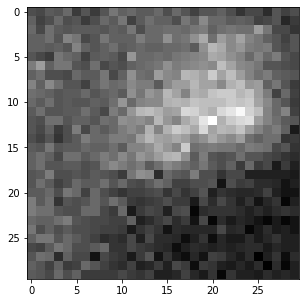

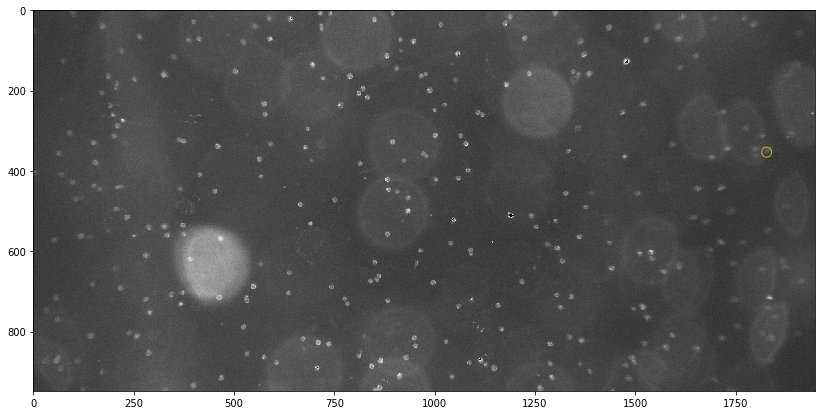

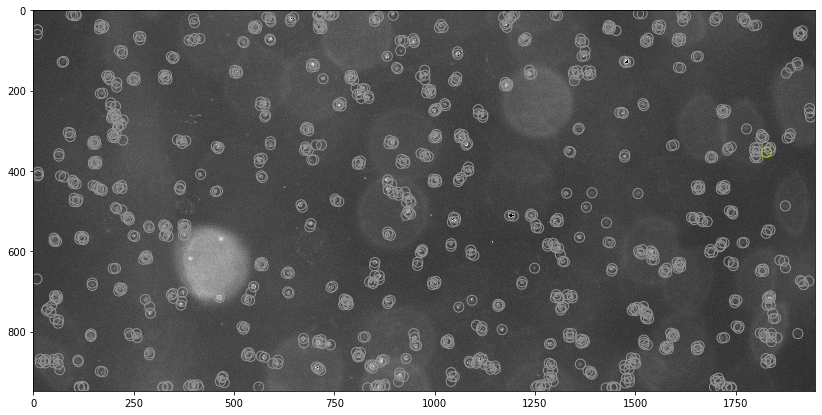

In [120]:
ind = 90

plt.figure(figsize=(5,5))
crop = im[df_filtered.ymin[ind]:df_filtered.ymax[ind], df_filtered.xmin[ind]:df_filtered.xmax[ind]]
plt.imshow(crop, cmap='gray')
plt.show()

plt.figure(figsize=(21,7))
plt.scatter([df_filtered.x[ind]], [df_filtered.y[ind]],
            s=100, facecolor='None', edgecolor='y')
plt.imshow(im, cmap='gray')
plt.show()

plt.figure(figsize=(21,7))
plt.scatter(df_filtered.x, df_filtered.y,
            s=100, facecolor='None', edgecolor='xkcd:gray')
plt.scatter([df_filtered.x[ind]], [df_filtered.y[ind]],
            s=100, facecolor='None', edgecolor='y')
plt.imshow(im, cmap='gray')
plt.show()

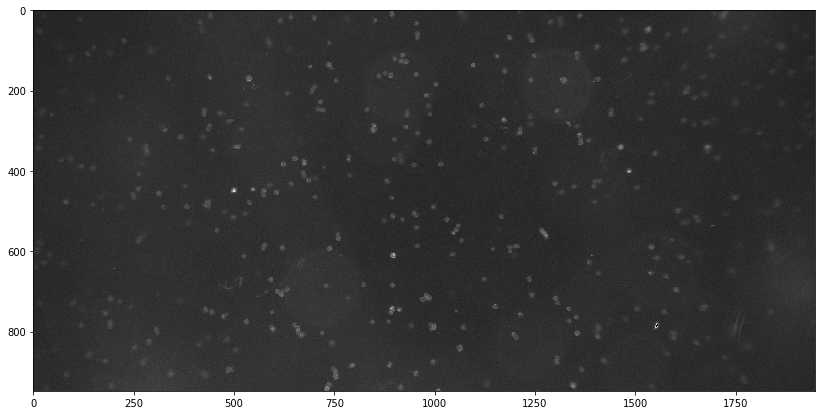

In [86]:
plt.figure(figsize=(21,7))
plt.imshow(im, cmap='gray')
plt.show()

# What does success look like?

A successful detection is a bounding box where either:
- there is only one cell in the image, and most of it made it into the image
- one cell is clearly in the center, even if there are other cells present in the bounding box

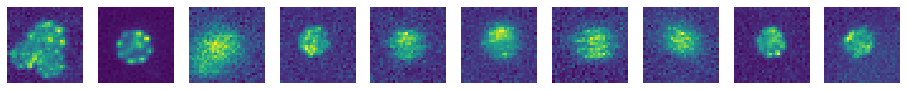

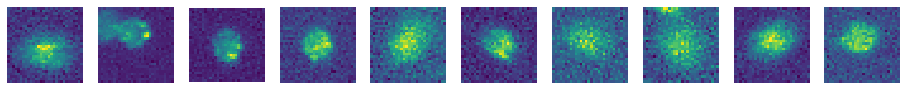

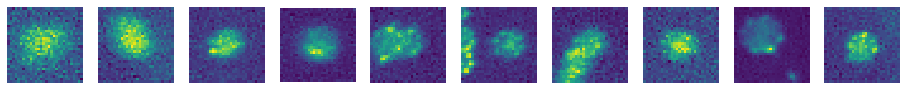

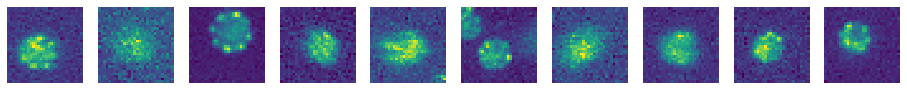

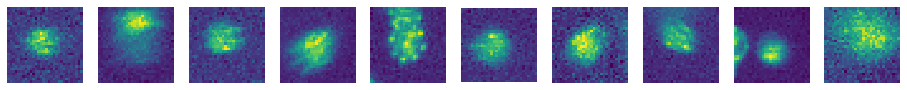

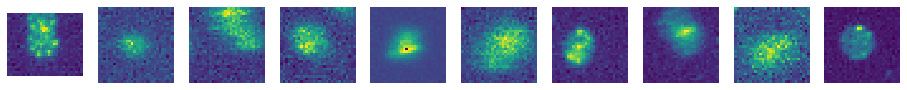

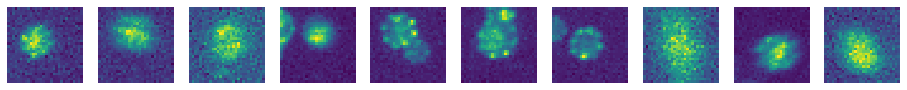

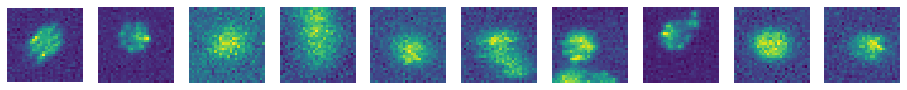

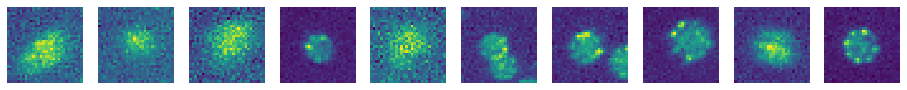

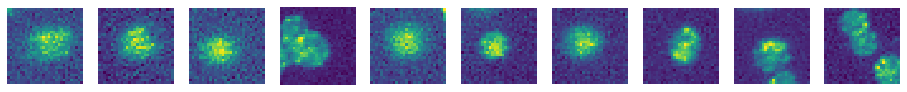

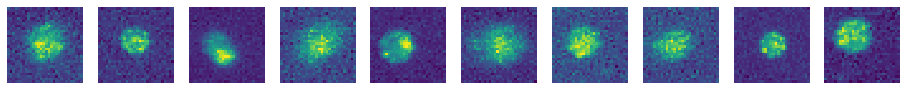

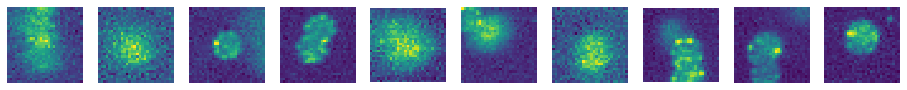

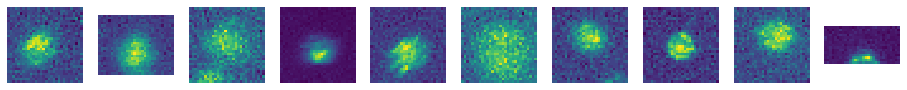

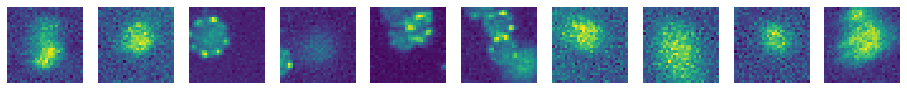

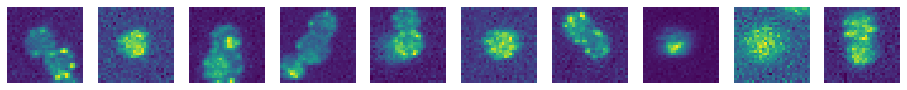

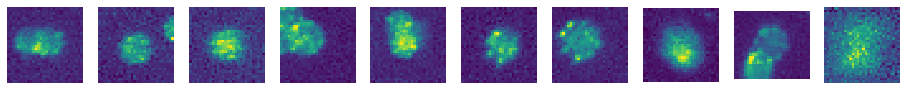

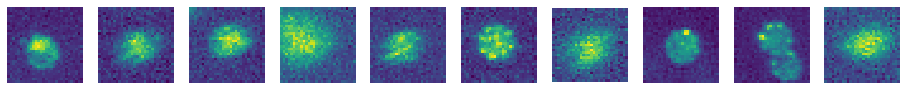

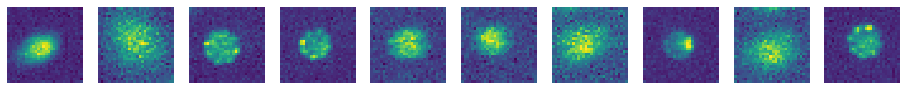

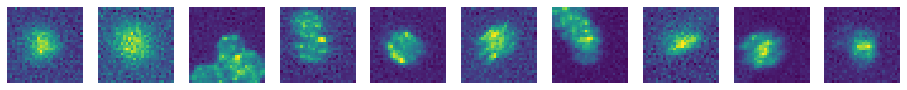

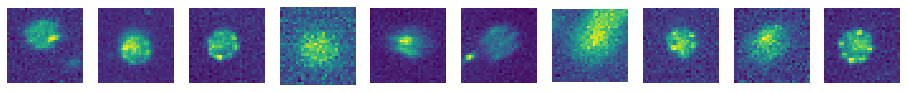

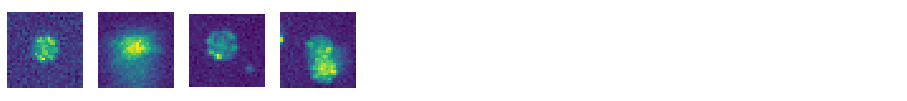

In [109]:
num_columns = 10

crops_dir = './crops/%s/successes/' % name
crop_files = listdir(crops_dir)
crop_names = []
for file in crop_files:
    if file[-4:]=='.png':
        crop_names.append(file[:-4])
crop_names = sorted(crop_names)

for i in np.arange(0, len(crop_names), num_columns):
    crop_ind = i
    fig, axes = plt.subplots(1, num_columns, figsize=(16, 16/num_horiz))
    for j in range(num_columns):
        if crop_ind < len(crop_names):
            im = imread(crops_dir + crop_names[crop_ind] + '.png')
            axes[j].imshow(im)
        axes[j].axis('off')
        crop_ind += 1
    plt.show()

# What does failure look like?

The predominant failure mode is when the detector puts a bounding box around or on a clump of cells with none of the cells in the center, or a bounding box around multiple cells which are apart, as though the two cells consitute one detection.

The detector does not seem to be detecting spots of dust and other debris that are not cells.

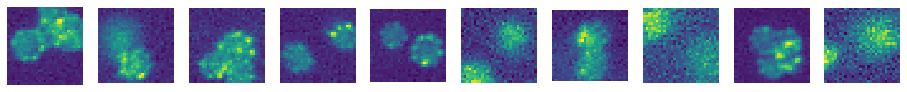

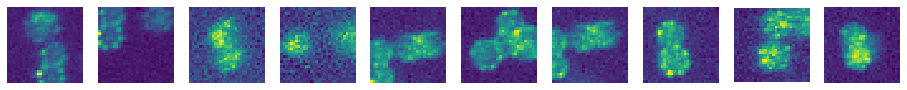

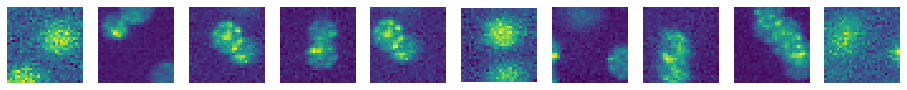

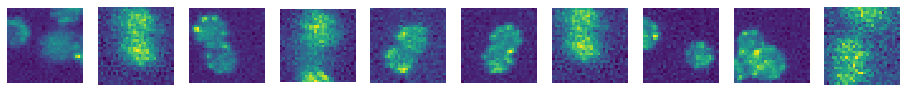

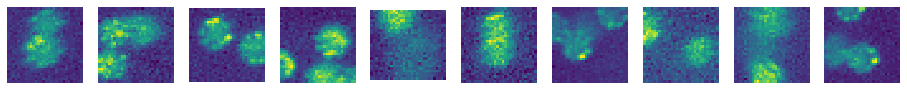

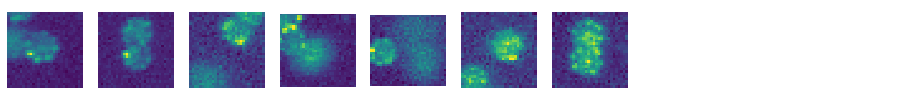

In [110]:
num_columns = 10

crops_dir = './crops/%s/failures/' % name
crop_files = listdir(crops_dir)
crop_names = []
for file in crop_files:
    if file[-4:]=='.png':
        crop_names.append(file[:-4])
crop_names = sorted(crop_names)

for i in np.arange(0, len(crop_names), num_columns):
    crop_ind = i
    fig, axes = plt.subplots(1, num_columns, figsize=(16, 16/num_horiz))
    for j in range(num_columns):
        if crop_ind < len(crop_names):
            im = imread(crops_dir + crop_names[crop_ind] + '.png')
            axes[j].imshow(im)
        axes[j].axis('off')
        crop_ind += 1
    plt.show()